## Introduction to Deep Learning 
# Part 4 - Multilayer Perceptron with Keras
### Build and visualize Simple feed forward dense network with Mnist data

In [139]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import utils_plot as uplot
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, log_loss
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

## Lets start Keras
In the Mnist classification example, we saw that the net basically learn templates.<br>
This is not robust enough for generalization. <br>
To generalize, we want the neural network to learn **features**. <br>
For that we will need deeper and more complexed networks.<br>
Lets build our first neural network with Keras.

We will use:

### Sequential Model
https://keras.io/models/sequential/

### Dense layer
https://keras.io/layers/core/

### Dropout layer
https://keras.io/layers/core/

### Optimizer RMSprop
https://keras.io/optimizers/

In [2]:
import keras
# Keras has many build in data sets
from keras.datasets import mnist
# Sequential is the basic feed forward neural network (FFN)
from keras.models import Sequential
# Dense is fully connected layer
# Dropout is a "noising" layer, to prevent over feet.
from keras.layers import Dense, Dropout
# Read about optimizers in keras documentation
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

## Lets start with simple binary classification example
### Create, normalize and split data

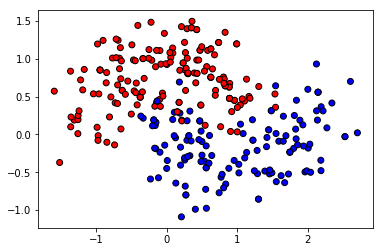

In [4]:
figure = plt.figure()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
idx = np.random.randint(1000, size=300)
X, y = make_moons(n_samples=1000,noise=0.3, random_state=0)
plt.scatter(X[idx, 0], X[idx, 1], c=y[idx], cmap=cm_bright,edgecolors='k')
    

In [5]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, 
                                                    random_state=42)
X_train.shape

(600, 2)

### Build and compile keras model

In [6]:
batch_size = 20
num_classes = 2
epochs = 10

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [7]:


history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))



Train on 600 samples, validate on 400 samples
Epoch 1/10
600/600 [==============================] - 0s 778us/step - loss: 0.6777 - acc: 0.6150 - val_loss: 0.6257 - val_acc: 0.7850
Epoch 2/10
600/600 [==============================] - 0s 86us/step - loss: 0.5620 - acc: 0.8733 - val_loss: 0.5410 - val_acc: 0.7975
Epoch 3/10
600/600 [==============================] - 0s 81us/step - loss: 0.4655 - acc: 0.8733 - val_loss: 0.4746 - val_acc: 0.7950
Epoch 4/10
600/600 [==============================] - 0s 80us/step - loss: 0.3920 - acc: 0.8717 - val_loss: 0.4316 - val_acc: 0.8000
Epoch 5/10
600/600 [==============================] - 0s 68us/step - loss: 0.3420 - acc: 0.8750 - val_loss: 0.4089 - val_acc: 0.8025
Epoch 6/10
600/600 [==============================] - 0s 81us/step - loss: 0.3136 - acc: 0.8733 - val_loss: 0.4016 - val_acc: 0.8075
Epoch 7/10
600/600 [==============================] - 0s 71us/step - loss: 0.3005 - acc: 0.8733 - val_loss: 0.4008 - val_acc: 0.8075
Epoch 8/10
600/600 [==

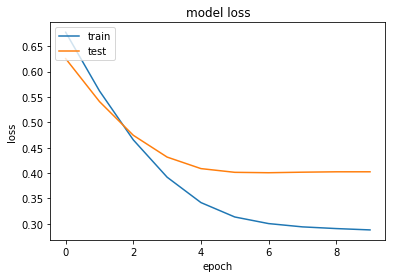

In [8]:
uplot.drow_history(history, 'loss')

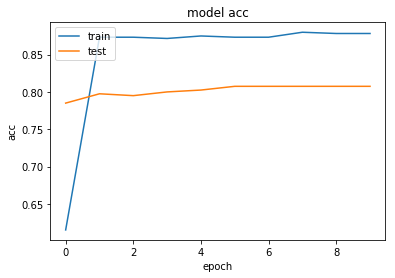

In [9]:
uplot.drow_history(history, 'acc')

## Evaluate model

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4026267373561859
Test accuracy: 0.8075


## Predict

In [11]:
pred_test = model.predict(X_test)
pred_test[0:5]

array([[0.27312145],
       [0.18187326],
       [0.8254743 ],
       [0.05761433],
       [0.12155072]], dtype=float32)

In [12]:
#y_pred_test=np.argmax(pred_test, axis=1)
y_pred_test = np.where(pred_test > 0.5, 1, 0).flatten()
y_pred_test[0:10], y_test[0:10]

(array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64))

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def print_stats(ytest, ypred):
    
    print("Accuracy: {:.5f}".format(accuracy_score(ytest, ypred)))
    print("Confusion Matrix:")
    print(confusion_matrix(ytest, ypred))
    print("Classification Report:")
    print(classification_report(ytest, ypred))

In [76]:
print_stats(y_test,y_pred_test )

Accuracy: 0.80900
Confusion Matrix:
[[789 194]
 [188 829]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       983
           1       0.81      0.82      0.81      1017

   micro avg       0.81      0.81      0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



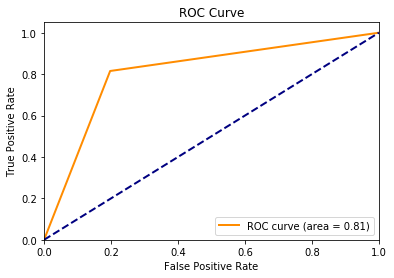

In [77]:
uplot.drow_roc_curve(y_test,y_pred_test)

## Model improovments
### Dropout
The method: For each hidden layer, for each training sample, for each iteration, ignore (zero out) a given fraction, randomly chosen p, of nodes.
Dropout forces a neural network to learn more robust features.


From https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

As a neural network learns, neuron weights settle into their context within the network. Weights of neurons are tuned for specific features providing some specialization. Neighboring neurons become to rely on this specialization, which if taken too far can result in a fragile model too specialized to the training data. This reliant on context for a neuron during training is referred to complex co-adaptations.

You can imagine that if neurons are randomly dropped out of the network during training, that other neurons will have to step in and handle the representation required to make predictions for the missing neurons. This is believed to result in multiple independent internal representations being learned by the network.

The effect is that the network becomes less sensitive to the specific weights of neurons. This in turn results in a network that is capable of better generalization and is less likely to overfit the training data.



## Hyper parameters: batch_size, number of epoch

In [87]:
batch_size = 30
epochs = 20

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(2,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 32)                96        
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 33        
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [88]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 3000 samples, validate on 2000 samples
Epoch 1/20
3000/3000 [==============================] - 1s 300us/step - loss: 0.7014 - acc: 0.5013 - val_loss: 0.6913 - val_acc: 0.4915
Epoch 2/20
3000/3000 [==============================] - 0s 78us/step - loss: 0.6903 - acc: 0.5083 - val_loss: 0.6858 - val_acc: 0.4915
Epoch 3/20
3000/3000 [==============================] - 0s 70us/step - loss: 0.6836 - acc: 0.5320 - val_loss: 0.6797 - val_acc: 0.4930
Epoch 4/20
3000/3000 [==============================] - 0s 69us/step - loss: 0.6766 - acc: 0.5453 - val_loss: 0.6714 - val_acc: 0.5240
Epoch 5/20
3000/3000 [==============================] - 0s 68us/step - loss: 0.6698 - acc: 0.5797 - val_loss: 0.6614 - val_acc: 0.6485
Epoch 6/20
3000/3000 [==============================] - 0s 74us/step - loss: 0.6572 - acc: 0.6280 - val_loss: 0.6484 - val_acc: 0.6560
Epoch 7/20
3000/3000 [==============================] - 0s 77us/step - loss: 0.6441 - acc: 0.6503 - val_loss: 0.6306 - val_acc: 0.6665
Epoch 

In [89]:
print_stats(y_test,y_pred_test )

Accuracy: 0.78250
Confusion Matrix:
[[855 128]
 [307 710]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       983
           1       0.85      0.70      0.77      1017

   micro avg       0.78      0.78      0.78      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.79      0.78      0.78      2000



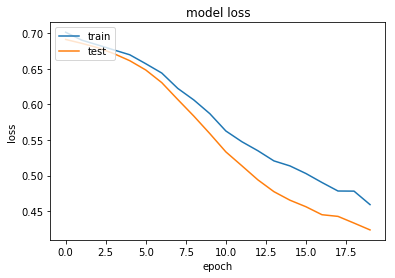

In [90]:
uplot.drow_history(history, 'loss')

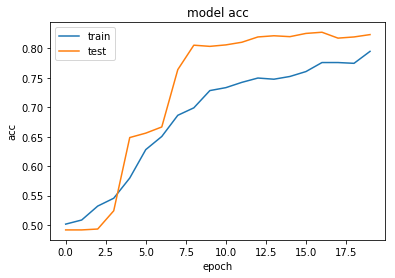

In [91]:
uplot.drow_history(history, 'loss')
uplot.drow_history(history, 'acc')

# Exercise
Following are code to create, normalize and split circle data.

1. Create model for classification of circles data. Same as we did in class
2. Try to improve the model.


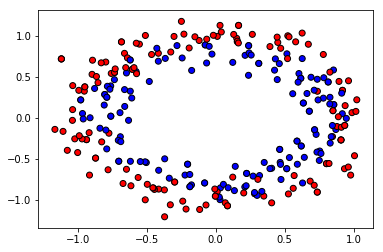

In [94]:
figure = plt.figure()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
X, y = make_circles(n_samples=5000,noise=0.1, random_state=0)
idx = np.random.randint(1000, size=300)
plt.scatter(X[idx, 0], X[idx, 1], c=y[idx], cmap=cm_bright,edgecolors='k')
    

In [95]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, 
                                                    random_state=42)
X_train.shape

(3000, 2)

# How to build a proper Classification model
* lable_data - to_categorical
* loss - categorical_crossentropy
* activation softmax

In [97]:
batch_size = 40
num_classes = 2
epochs = 10

y_train2 = keras.utils.to_categorical(y_train, num_classes)
y_test2 = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train2,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test2))

score = model.evaluate(X_test, y_test2, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_44 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_45 (Dense)             (None, 2)                 34        
Total params: 354
Trainable params: 354
Non-trainable params: 0
_________________________________________________________________
Train on 3000 samples, validate on 2000 samples
Epoch 1/10
3000/3000 [==============================] - 1s 269us/step - loss: 0.6850 - acc: 0.5237 - val_loss: 0.6794 - val_acc: 0.5370
Epoch 2/10
3000/3000 [==============================] - 0s 51us/step - loss: 0.6689 - acc: 0.5693 - val_loss: 0.6658 - val_acc: 0.5730
Epoch 3/10
3000/3000 [==============================] - 0s 52us/step - loss: 0.6554 - acc

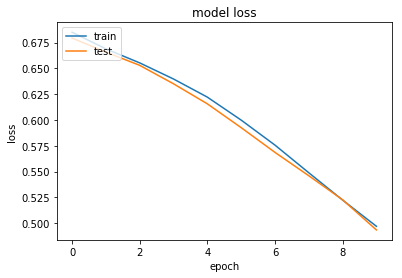

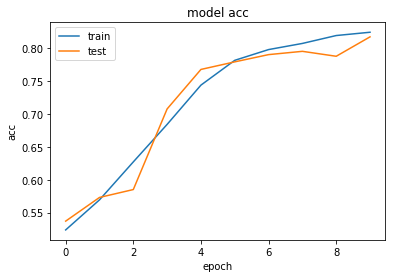

In [98]:
uplot.drow_history(history, 'loss')
uplot.drow_history(history, 'acc')

## Predict

In [81]:
pred_test = model.predict(X_test)
pred_test[0:5]

array([[0.7152842 , 0.2847158 ],
       [0.59119993, 0.40880004],
       [0.39089695, 0.609103  ],
       [0.5745699 , 0.4254301 ],
       [0.46964228, 0.53035766]], dtype=float32)

In [82]:
y_pred_test=np.argmax(pred_test, axis=1)
y_pred_test[0:10], y_test[0:10]

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64),
 array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64))

In [83]:
pred_test = model.predict_classes(X_test)
pred_test[0:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [84]:
print_stats(y_test,pred_test )

Accuracy: 0.78250
Confusion Matrix:
[[855 128]
 [307 710]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       983
           1       0.85      0.70      0.77      1017

   micro avg       0.78      0.78      0.78      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.79      0.78      0.78      2000



In [99]:
## Continue train
history = model.fit(X_train, y_train2,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test2))



Train on 3000 samples, validate on 2000 samples
Epoch 1/10
3000/3000 [==============================] - 0s 48us/step - loss: 0.4722 - acc: 0.8273 - val_loss: 0.4747 - val_acc: 0.8120
Epoch 2/10
3000/3000 [==============================] - 0s 50us/step - loss: 0.4517 - acc: 0.8320 - val_loss: 0.4555 - val_acc: 0.8205
Epoch 3/10
3000/3000 [==============================] - 0s 57us/step - loss: 0.4324 - acc: 0.8277 - val_loss: 0.4443 - val_acc: 0.8150
Epoch 4/10
3000/3000 [==============================] - 0s 45us/step - loss: 0.4179 - acc: 0.8303 - val_loss: 0.4276 - val_acc: 0.8240
Epoch 5/10
3000/3000 [==============================] - 0s 52us/step - loss: 0.4084 - acc: 0.8350 - val_loss: 0.4201 - val_acc: 0.8165
Epoch 6/10
3000/3000 [==============================] - 0s 46us/step - loss: 0.3991 - acc: 0.8327 - val_loss: 0.4141 - val_acc: 0.8190
Epoch 7/10
3000/3000 [==============================] - 0s 50us/step - loss: 0.3918 - acc: 0.8343 - val_loss: 0.4106 - val_acc: 0.8230
Epoch 8

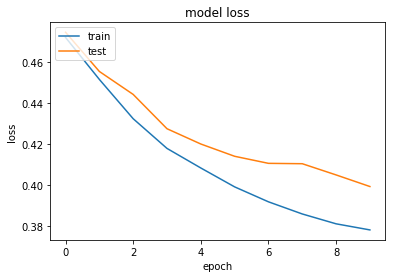

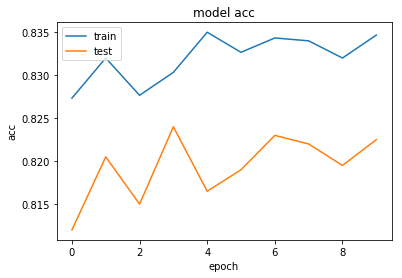

In [100]:
uplot.drow_history(history, 'loss')
uplot.drow_history(history, 'acc')

## Evaluate

In [101]:
score = model.evaluate(X_test, y_test2, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.39930686116218567
Test accuracy: 0.8225


## Predict

In [103]:
pred_test = model.predict(X_test)
pred_test[0:5]

array([[0.9453157 , 0.05468423],
       [0.59220564, 0.4077944 ],
       [0.09901904, 0.900981  ],
       [0.5681255 , 0.4318745 ],
       [0.20957005, 0.7904299 ]], dtype=float32)

In [104]:
y_pred_test=np.argmax(pred_test, axis=1)
y_pred_test[0:10], y_test[0:10]

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64),
 array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64))

In [105]:
pred_test = model.predict_classes(X_test)
pred_test[0:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [106]:
print_stats(y_test,pred_test )

Accuracy: 0.82250
Confusion Matrix:
[[811 172]
 [183 834]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       983
           1       0.83      0.82      0.82      1017

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



## Hyper parameters: Optimizers
https://keras.io/optimizers/

In [112]:
from keras.optimizers import Adam,Adadelta, Adagrad, SGD

batch_size = 40
num_classes = 2
epochs = 20


model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train2,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test2))

score = model.evaluate(X_test, y_test2, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_62 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_63 (Dense)             (None, 2)                 34        
Total params: 354
Trainable params: 354
Non-trainable params: 0
_________________________________________________________________
Train on 3000 samples, validate on 2000 samples
Epoch 1/20
3000/3000 [==============================] - 1s 399us/step - loss: 0.6839 - acc: 0.5257 - val_loss: 0.6824 - val_acc: 0.5115
Epoch 2/20
3000/3000 [==============================] - 0s 64us/step - loss: 0.6739 - acc: 0.5417 - val_loss: 0.6729 - val_acc: 0.5435
Epoch 3/20
3000/3000 [==============================] - 0s 75us/step - loss: 0.6642 - acc

## Mnist example

In [142]:
batch_size = 128
num_classes = 10


# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [143]:
# convert class vectors to binary class matrices
# create "dummy" variables for each category
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Create the model
In previous chapter,I used the word network,in practical world, it called model.<br>
Model is from keras examples: https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

In [144]:

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_77 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_78 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [145]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.2192 - acc: 0.9315 - val_loss: 0.0901 - val_acc: 0.9711
Epoch 2/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0815 - acc: 0.9749 - val_loss: 0.0894 - val_acc: 0.9726
Epoch 3/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0528 - acc: 0.9836 - val_loss: 0.0968 - val_acc: 0.9727
Epoch 4/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0386 - acc: 0.9882 - val_loss: 0.0824 - val_acc: 0.9781
Epoch 5/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0303 - acc: 0.9907 - val_loss: 0.1012 - val_acc: 0.9735
Epoch 6/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.0242 - acc: 0.9924 - val_loss: 0.0920 - val_acc: 0.9809
Epoch 7/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0202 - acc: 0.9938 - val_loss: 0.

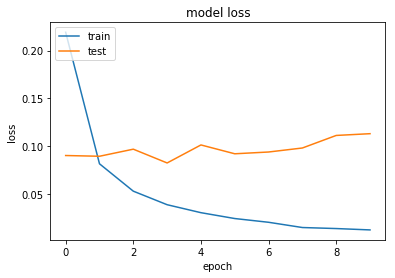

In [146]:
uplot.drow_history(history, 'loss')

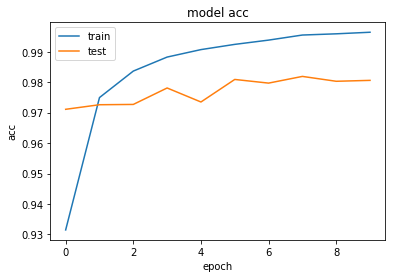

In [147]:
uplot.drow_history(history, 'acc')

We can see that 2 epoch is best suitable for this classification task. After 2 epoch, the net starts to overffit to the data.

In [148]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11301105657615917
Test accuracy: 0.9806


# Visualize Model layers
While training the model, lets view the layers, meaning the incoming weights, to each neuron in the layer. Lets train for 2 epoch's, and examine the results. 

In [149]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=2,
                    verbose=1,
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_80 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_81 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 12s 203us/step - loss: 0.2242 - acc: 0.9303 - val_loss: 0.1229 - val_acc: 0.9626
Epoch 2/2
60000/60000 [==============================] - 11s 185us/step - loss: 0.0830 - acc: 0.9744 - val_loss: 0.0841 - val_acc: 0.9733


### First Hidden Layer
First layer is a dense layer of size 512, meaning that each input pixel intensity, from the 764 inputs, is connected to each neuron in the hidden layer.<br>
So we get $784*512$ incoming weights to the first hidden layer. Lets look at them:

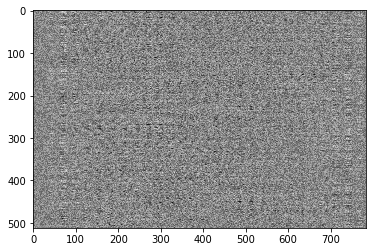

In [34]:
W0 = model.get_layer(name=model.layers[0].name).get_weights()[0]
W0a=W0.reshape((784,512)).copy()
plt.imshow(W0a.T);
plt.set_cmap('gray')

Each row in the above matrix,is multiplication by the input layer pixels intensities,or the input vector, and produce $512$ input vector to the next layer.<br>
To demonstrate the weights, we will reshape each row(of 784 weights) back to the (28,28) original shape, so we can see what patterns are causing activation.

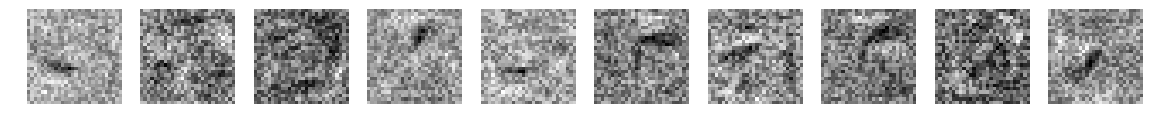

In [35]:
import utils_plot as uplot
dense_list0 = [W0a.T[i, :].reshape(28,28) for i in range(10)]
uplot.show_list_images(dense_list0)

### Activation Example of the First Hidden Layer
Lets check the network "response" or activation, to one of the digit images from the test set, and follow the weighs and activation flow down to the last output layer.<br>
To do that, we multiply $W^T*X$,where $X$ is an input image. <br>
The image:

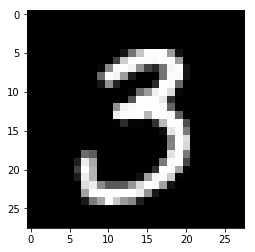

In [36]:
W70=W0a.T*x_test[90]
plt.imshow(x_test[90].reshape(28,28))

Lets view the activation of the image, the result of the multiplication above.

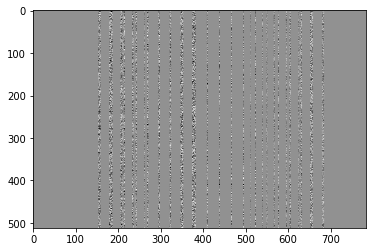

In [37]:
plt.imshow(W70)

Again,to understand the activation patterns,we reshape them back to the(28,28) original shape.

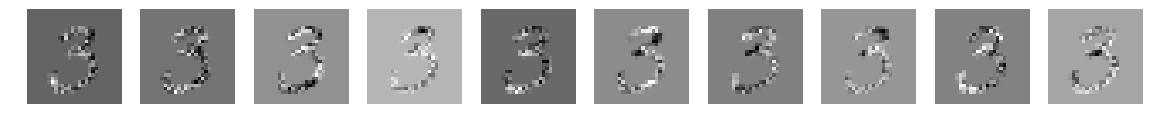

In [38]:
dense_list70 = [W70[i, :].reshape(28,28) for i in range(10)]
uplot.show_list_images(dense_list70)

### Second hodden layer

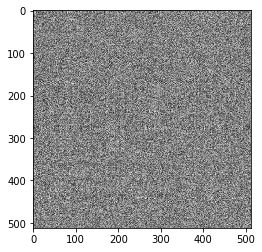

In [39]:
W1 = model.get_layer(name=model.layers[1].name).get_weights()[0]
Wa1=W1.reshape((512,512)).copy()
plt.imshow(Wa1)

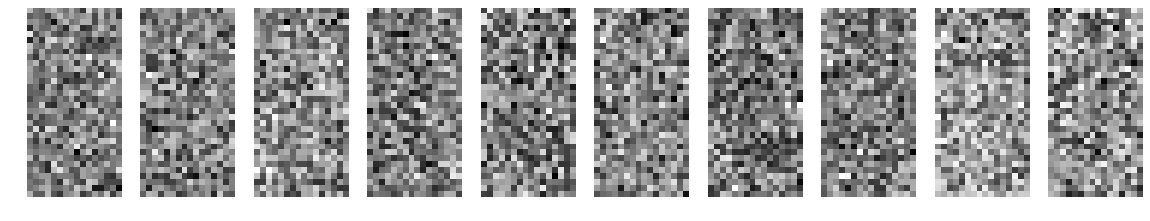

In [40]:
dense_list1= [Wa1[i,:].reshape(32,16) for i in range(10)]
uplot.show_list_images(dense_list1)


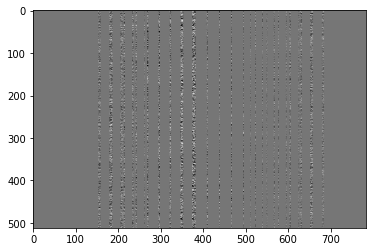

In [41]:
W17 = np.dot((Wa1.T),W70)
plt.imshow(W17)

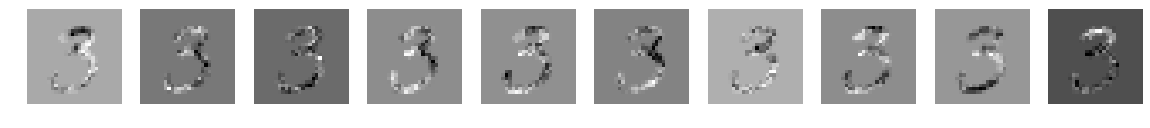

In [42]:
dense_list17= [W17[i,:].reshape(28,28) for i in range(10)]
uplot.show_list_images(dense_list17)

### Last Dense Layer
Last dense layer size is 10, as the number of classes. Following is a view of this Layer, as a matrix, and with each row resized to a rectangle.

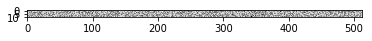

In [43]:
W2 = model.get_layer(name=model.layers[2].name).get_weights()[0]
W2a=W2.reshape((10,512)).copy()
plt.imshow(W2a)

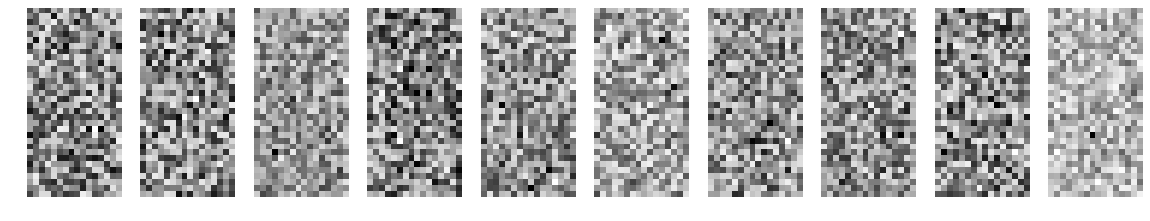

In [44]:

dense_list2= [W2a[i, :].reshape(32,16) for i in range(10)]
uplot.show_list_images(dense_list2)

Hard to see any patterns in this layer visualization. 

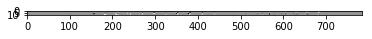

In [45]:
W27=np.dot(W2.T,W17)
plt.imshow(W27)

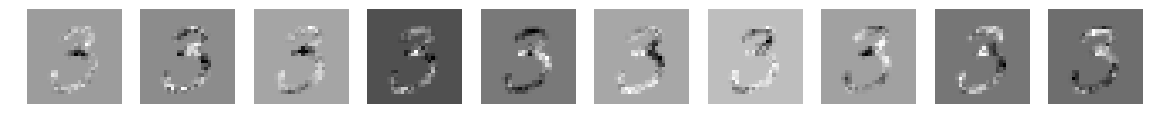

In [46]:
dense_list27= [W27[i, :].reshape(28,28) for i in range(10)]
uplot.show_list_images(dense_list27)

### Apply Softmax on the last hidden layer.
We can see from the weights image, that the "template" or row for the digit 3, is standing out in the activation row, and that is reflected in the numbers.

In [47]:

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference


In [48]:
print([W27[i].sum() for i in range(10)])
x = [W27[i].sum() for i in range(10)]

pred = softmax(x)#np.exp(x)/np.sum(x)

for i in range(10):
    print("{0:.2f}".format(pred[i]), end=' ')

[14.74125, -4.447997, -15.109924, 47.47204, -25.210785, -12.301833, -32.560196, -22.024303, 33.216496, 18.432804]
0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 

We can see quit clearly the performing templates, it can easily bring to over-fit. To decrease the chances of that, we add a down-sampling,or noising layer, called Dropout. 
## Dropout hidden layer
The method: For each hidden layer, for each training sample, for each iteration, ignore (zero out) a given fraction, randomly chosen p, of nodes.<br>
Dropout forces a neural network to learn more robust features.<br>
Lets compare the results of the previous network, to a network with dropout layers,between the dense layers:

In [49]:
# Create the model, and lay the layers oneontop of the other
# specifing layers parameters.
def get_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [50]:
# Initialize model, and train for 10 epoch
model = get_model()
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.2425 - acc: 0.9257 - val_loss: 0.1141 - val_acc: 0.9648
Epoch 2/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.1023 - acc: 0.9689 - val_loss: 0.0775 - val_acc: 0.9765
Epoch 3/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0749 - acc: 0.9774 - val_loss: 0.0761 - val_acc: 0.9776
Epoch 4/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0607 - acc: 0.9817 - val_loss: 0.0822 - val_acc: 0.9780
Epoch 5/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0508 - acc: 0.9842 - val_loss: 0.0759 - val_acc: 0.9801
Epoch 6/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.0433 - acc: 0.9872 - val_loss: 0.0817 - val_acc: 0.9795
Epoch 7/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0374 - acc: 0.9892 - val_loss: 0.07

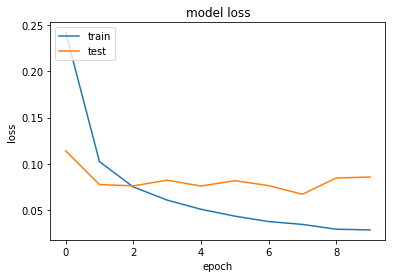

In [52]:
uplot.drow_history(history, 'loss')

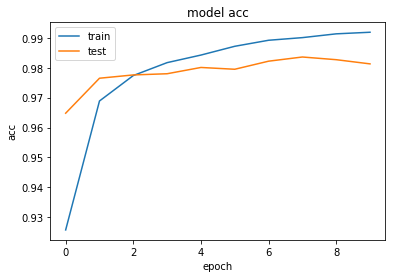

In [53]:
uplot.drow_history(history, 'acc')

We can see that 2 epoch is best suitable for this classification task. After 2 epoch, the net starts to overffit to the data.

In [54]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08569232398953491
Test accuracy: 0.9813


## Predict
Following are few predictions of the trained network.

In [55]:
print(type(x_train))

<class 'numpy.ndarray'>


In [150]:


predictions = model.predict(x_test[100:120]);
print('Predictions:\n')
print(predictions)
print('\nTrue Lables:\n')
print(np.argmax(y_test[100:102],axis=1))


Predictions:

[[2.60022953e-05 4.17846081e-07 1.11416591e-06 5.73673624e-08
  4.91750143e-06 5.77252376e-06 9.99957681e-01 8.58973465e-07
  3.25617702e-06 2.65473403e-08]
 [9.99999642e-01 2.83159672e-13 1.97313454e-09 3.85833102e-11
  2.27390502e-11 1.05128422e-07 2.92794454e-07 2.50567336e-08
  1.29414413e-09 1.19584085e-08]
 [8.23497493e-14 5.12887970e-14 7.70525808e-16 9.13741758e-07
  5.87209892e-17 9.99999046e-01 4.83649850e-13 1.88158137e-13
  1.76301662e-09 3.24190313e-10]
 [2.79661992e-12 1.13180347e-10 3.13447129e-10 1.07664149e-12
  1.00000000e+00 2.25051974e-11 3.30616055e-11 1.51678115e-10
  3.56335683e-10 2.02582617e-09]
 [4.62041839e-07 1.43337264e-09 5.83354982e-08 4.94944863e-04
  1.90383457e-06 1.96190402e-02 8.22756547e-08 4.16267767e-06
  5.44590526e-04 9.79334712e-01]
 [1.73613785e-07 1.66947061e-08 3.65961938e-07 2.69288255e-04
  1.14588338e-05 1.92670544e-04 3.68368869e-09 1.26707873e-05
  8.11023638e-04 9.98702288e-01]
 [2.07619155e-06 7.10273844e-06 9.99966502e-

In [162]:


predictions_classes = model.predict_classes(x_test);
print('Predictions:\n')
print(predictions_classes[100:120])
print('\nTrue Lables:\n')
print(np.argmax(y_test[100:120],axis=1))



Predictions:

[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 9 4 4 9 2]

True Lables:

[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2]


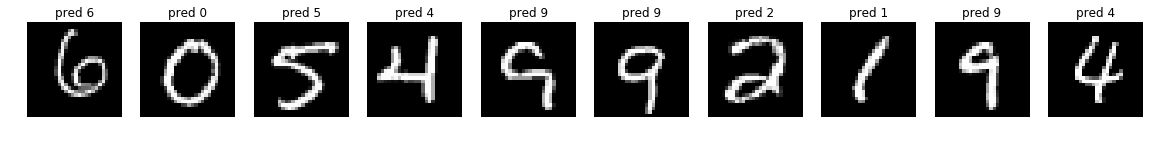

In [163]:

imgs = [x_test[i].reshape(28,28) for i in range(100,110)]
titles = [("pred {}").format(predictions[i]) for i in range(20)]
uplot.show_list_images(imgs, titles)

In [169]:
keras.utils.to_categorical(predictions_classes,10)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [173]:
predictions_classes,

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [174]:
print_stats(np.argmax(y_test,axis=1), predictions_classes)

Accuracy: 0.97330
Confusion Matrix:
[[ 973    0    0    0    0    0    3    1    2    1]
 [   0 1128    3    0    0    0    1    0    3    0]
 [   8    7  979    0   11    0    3    6   18    0]
 [   0    0    3  969    0   17    2    6    8    5]
 [   1    1    1    0  960    0    5    2    4    8]
 [   3    0    0    5    2  868    7    1    5    1]
 [   5    4    0    1    5    3  934    0    6    0]
 [   3   11    4    0    0    0    0 1000    7    3]
 [   7    1    1    1    2    4    1    3  951    3]
 [   4    5    0    2    8    5    0    7    7  971]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.99      0.95      0.97      1032
           3       0.99      0.96      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.

## Classification Exercise Fashion Mnist
https://keras.io/datasets/
Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:
```
* Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
```

Build the best model for this data

In [114]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [120]:
x_train[0].shape, x_train.shape,x_test.shape

((28, 28), (60000, 28, 28), (10000, 28, 28))

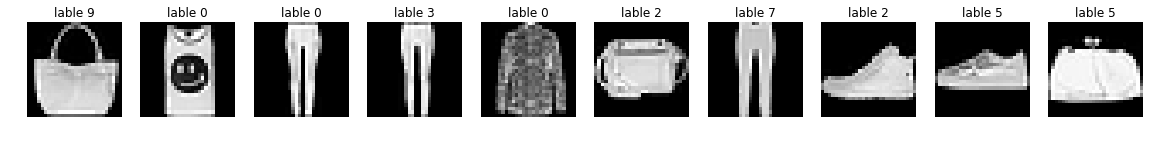

In [119]:
imgs = [x_train[i].reshape(28,28) for i in range(100,110)]
titles = [("lable {}").format(y_train[i]) for i in range(20)]
uplot.show_list_images(imgs, titles)

In [125]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [127]:
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [128]:
## model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=2,
                    verbose=1,
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_65 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_66 (Dense)             (None, 2)                 1026      
_________________________________________________________________
dense_67 (Dense)             (None, 512)               1536      
_________________________________________________________________
dense_68 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_69 (Dense)             (None, 2)                 1026      
_________________________________________________________________
dense_70 (Dense)             (None, 512)               1536      
__________

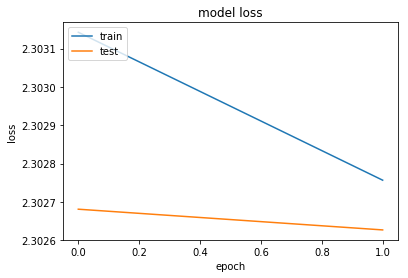

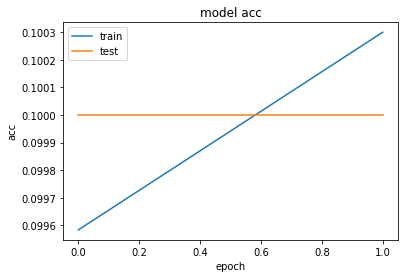

In [129]:
uplot.drow_history(history, 'loss')
uplot.drow_history(history, 'acc')

## Evaluate

In [131]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.302626865386963
Test accuracy: 0.1


## Predict

In [133]:
pred_test = model.predict(x_test)
pred_test[0:5]

array([[0.10071922, 0.09950797, 0.10104667, 0.09964965, 0.101262  ,
        0.09999365, 0.09787526, 0.09964686, 0.10032938, 0.09996936],
       [0.10071922, 0.09950797, 0.10104667, 0.09964965, 0.101262  ,
        0.09999365, 0.09787526, 0.09964686, 0.10032938, 0.09996936],
       [0.10071922, 0.09950797, 0.10104667, 0.09964965, 0.101262  ,
        0.09999365, 0.09787526, 0.09964686, 0.10032938, 0.09996936],
       [0.10071922, 0.09950797, 0.10104667, 0.09964965, 0.101262  ,
        0.09999365, 0.09787526, 0.09964686, 0.10032938, 0.09996936],
       [0.10071922, 0.09950797, 0.10104667, 0.09964965, 0.101262  ,
        0.09999365, 0.09787526, 0.09964686, 0.10032938, 0.09996936]],
      dtype=float32)

In [134]:
y_pred_test=np.argmax(pred_test, axis=1)
y_pred_test[0:10], y_test[0:10]

(array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))

In [135]:
pred_test = model.predict_classes(x_test)
pred_test[0:5]

array([4, 4, 4, 4, 4], dtype=int64)

In [140]:
print_stats(np.argmax(y_test, axis=1),y_pred_test )

Accuracy: 0.10000
Confusion Matrix:
[[   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.10      1.00      0.18      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.

We can see that the prediction are very accurate, but we can see as well that the network is limited in its ability to understand digits in different locations and orientations. <br>
Lets think about the following idea: We have an image, with a digit inside. if we can "move" our network around, and position it on the part containing the digit, in the right orientation, we can  classify the digit correctly. This is, in a very simplified form, the idea of **convolutional neural  networks**. They work with sets of filters, slided over the image, to capture specific features, without being bind to specific location.

### Learn more:
* https://keras.io/
* https://www.coursera.org/learn/neural-networks/lecture/kOQiH/why-object-recognition-is-difficult-5-min

### Articles:
* Zhe Li1, Boqing Gong, Tianbao Yang. **Improved Dropout for Shallow and Deep Learning**, 
The University of Iowa, Iowa city, IA 52245. University of Central Florida, Orlando, FL 32816. https://arxiv.org/pdf/1602.02220.pdf
* Nitish Srivastava,Geoffrey Hinton, Alex Krizhevsky, Ruslan Salakhutdinov, Ilya Sutskever. **Dropout: A Simple Way to Prevent Neural Networks from Overfitting**,  June 2014Journal of Machine Learning Research 15(1):1929-1958
* Ilya Sutskever, James Martens, George Dahl, Geoffrey Hinton. **On the importance of initialization and momentum in deep learning**.  ICML'13 Proceedings of the 30th International Conference on International Conference on Machine Learning - Volume 28 Pages III-1139-III-1147. Atlanta, GA, USA — June 16 - 21, 2013 http://proceedings.mlr.press/v28/sutskever13.pdf

